# WRE Project

In [1]:
#modules
import os
import pandas as pd
import numpy as np
#os.chdir("C:/Users/marie/Documents/WREProj")
import matplotlib.pyplot as plt

In [2]:
#parameters
sw=0.25
s1=0.4
n=0.3     # [-]
Qb=7      # m3/s
tsup=22
A=4000
phi=38

ksat=ksat=10e-7  #UNITEEEEEEEEEEEESSSSS
c=10
#tsub=
z=1000

In [3]:
#% mean monthly temperature [C]
temperature= pd.read_csv("temperature.txt")
Tm=temperature.T.to_numpy()[0]
#%hourly precipitation intensity [mm/h] for the period 01/01/2000 to 31/12/2005
precipitation=pd.read_csv("P.txt").T.to_numpy()[0]

#% Changes in monthly temperature [degrees C]
temperature_change= pd.read_csv("temperature_change.txt")
Tc=temperature_change.T.to_numpy()[0]

#%monthly mean crop coefficient [-] (average among all the crops and soil uses of the basin
cropcoeff=pd.read_csv("kc.txt")
Kc=cropcoeff.T.to_numpy()[0]



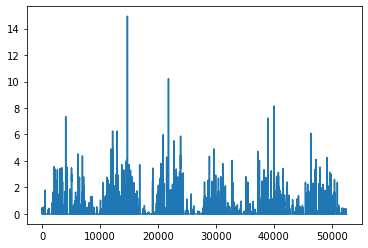

In [4]:
plt.plot(precipitation)

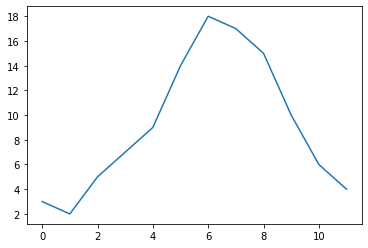

In [5]:
plt.plot(temperature)

In [6]:
day_month=[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]; #"day_month": number of days for each month
month_end=np.cumsum(day_month)-1                    #"month_end": last day of each month
month_start=month_end-day_month+1

def month(t):
    j= (t//24)%365 # jour de l'année
    if j> month_start[11]:
        return 11
    else:
        m=0
        while j > month_start[m]-1:
            m=m+1
        return m
    
    
    
    # return the month corresponding to t
    

## Soil Properties

In [7]:
def K(s):
    return ksat*s**c


In [8]:
def L(s,t):
    return ksat*s**c

## Precipitation/ Infilatration / Runoff

In [9]:
def P(t):
    # voir si besoin de trouver l'heure, int
    return precipitation[t]

In [10]:
def I(t):
    return min(P(t),ksat/3.6) # unite a verifier !!!!!!!!!!!!!!!!!!


In [11]:
def R(t):
    return P(t)-I(t)

In [12]:
I(3)

2.7777777777777776e-07

## Evapotranspiration

In [14]:
#Thornthwaite equation
lat=38   #latitude of the site (degree)
D=[k for k in range(1,366)]  #day of the years    
delta=[0.409*np.sin(2*np.pi*d/365-1.39)for d in D]
omega_s=[np.arccos(-np.tan(lat*np.pi/180)*np.tan(i)) for i in delta]
N_D=[24*o/np.pi for o in omega_s]



N_m=np.zeros(12)
for m in range(0,12):
    N_m[m]=np.mean(N_D[month_start[m]:month_end[m]])
Ii=0
for i in range (0,12):
    Ii=Ii+(Tm[m]/5)**1.514
    
a=6.75e-7*Ii**3-7.71e-5*Ii**2+1.79e-2*Ii+0.49
T_ET0=[16*N_m[i]/12*(10*Tm[i]/Ii)**a for i in range (0,12)]




In [15]:
def ET0(t):
    return T_ET0[month(t)]


In [16]:
def ET(t,s):
    if (s<sw):
        return 0
    elif (s>=sw and s<s1):
        return ET0(t)*Kc[month(t)]/(s1-sw)*(s-sw)
    else:
        return ET0(t)*Kc[month(t)]

Text(0, 0.5, 'ET(s)')

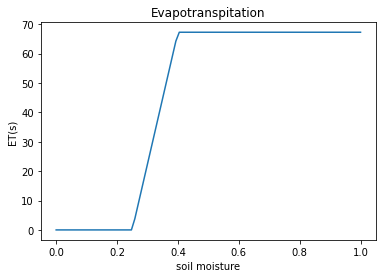

In [17]:
s=np.linspace(0,1,90)
E=[ET(24*90,si) for si in s]
plt.plot(s,E)
plt.title ("Evapotranspitation")
plt.xlabel("soil moisture")
plt.ylabel("ET(s)")

## Soil Moisture Dynamic in the root zone

In [18]:
N=len(precipitation)
s=np.zeros(N)
In=[I(t) for t in range (0,N)]
EvapT=np.zeros(N)
Leaching=np.zeros(N)

dt=1 # heure

s[0]=0 # a revoir la condition initiale peut changer
EvapT[0]=ET(0,s[0])
Leaching[0]= L(0,s[0])

for t in range (1,N):
    s[t]=s[t-1]+dt*(In[t-1]-EvapT[t-1]-Leaching[t-1])/(n*z)

## Routing

In [19]:
# Qsup

In [20]:
# Qsub

In [21]:
I(3)

2.7777777777777776e-07